In [13]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

In [14]:
# pulls data from https://figshare.com/s/95f2fed733dec170b998?file=30562257
# (a database of ~250k molecules docked to 50 proteins)
# creates a heatmap showing correlations between different targets 
# to help pick which targets to use for the next test 

In [15]:
# takes about 10 seconds
data_url = "https://figshare.com/ndownloader/files/30562257?private_link=95f2fed733dec170b998"
df = pd.read_csv(data_url, sep='\t')


In [37]:
df = df.reindex(sorted(df.columns), axis=1)

smiles = df.values[:,1]
targets = df.columns[2:-1]
scores = df.values[:,2:-1]

print('There are ' + str(scores.shape[1]) + ' targets ')
print('and ' + str(scores.shape[0]) + ' molecules as SMILES strings')

There are 57 targets 
and 260155 molecules as SMILES strings


In [38]:
print(targets)

Index(['ADAM17', 'ADORA2A', 'ADRB1', 'ADRB2', 'AKT1', 'AKT2', 'AR', 'BACE1',
       'CA2', 'CASP3', 'CDK2', 'CSF1R', 'CYP2C9', 'CYP3A4', 'DHFR', 'DPP4',
       'DRD2', 'DRD3', 'EGFR', 'ESR1', 'ESR2', 'F10', 'F2', 'FGFR1', 'GBA',
       'HMGCR', 'HSD11B1', 'HSP90AA1', 'IGF1R', 'JAK2', 'KDR', 'KIT', 'LCK',
       'MAOB', 'MAP2K1', 'MAPK1', 'MAPK14', 'MAPKAPK2', 'MET', 'MMP13', 'NOS1',
       'NR3C1', 'PARP1', 'PDE5A', 'PGR', 'PLK1', 'PPARA', 'PPARD', 'PPARG',
       'PTGS2', 'PTK2', 'PTPN1', 'REN', 'ROCK1', 'SRC', 'THRB', 'inchikey'],
      dtype='object')


In [45]:
data_df = df[targets[0:25]]
corr_mat = data_df.corr()


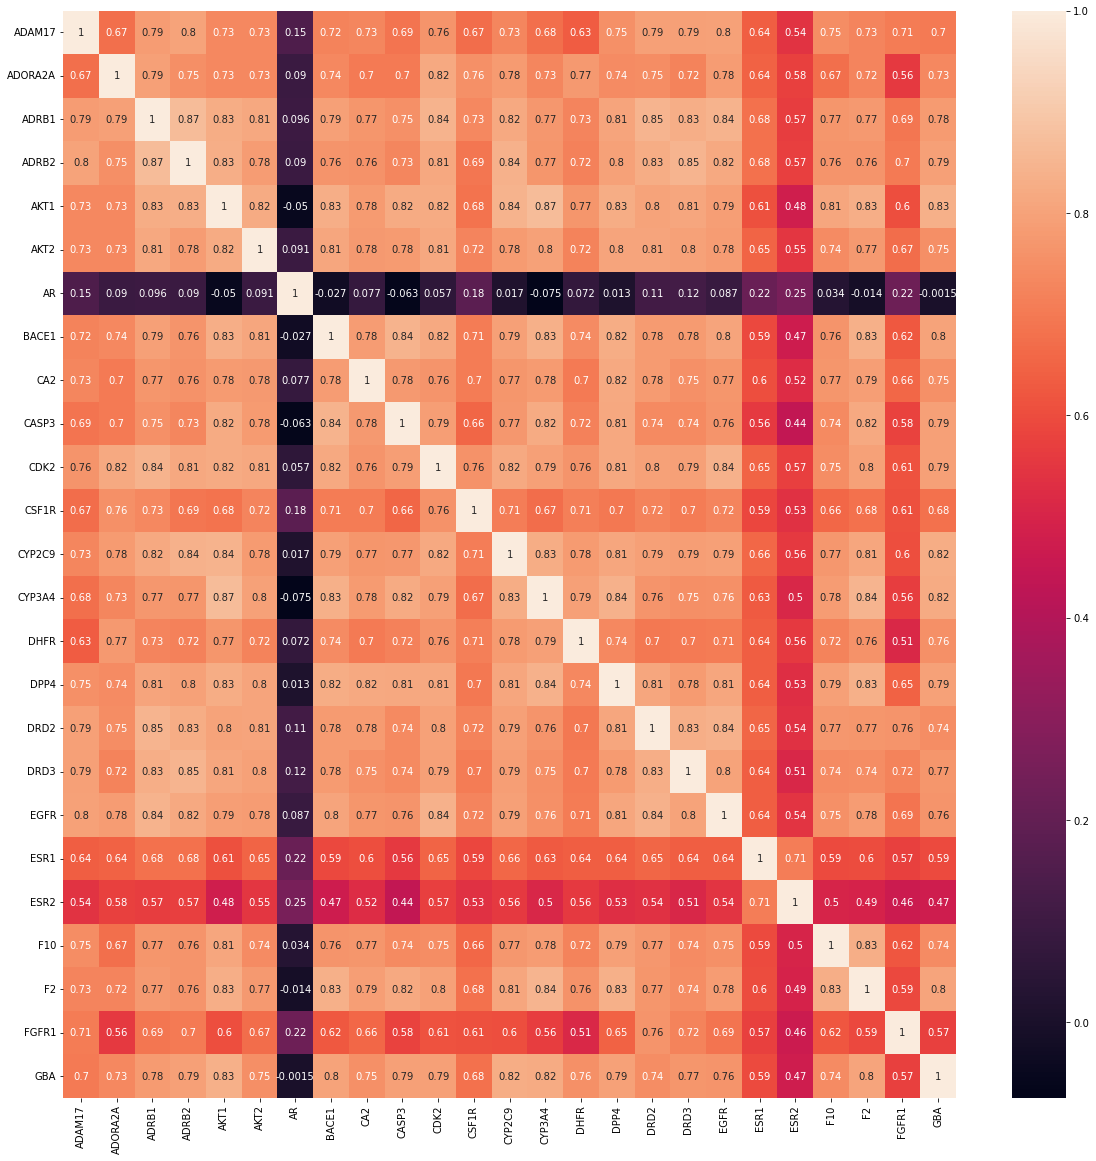

In [46]:
fig, _ = plt.subplots(figsize=[20,20])
sn.heatmap(corr_mat, annot=True, cmap=sn.cm.rocket)
plt.show()

In [ ]:
# high corrleation between DRD2 and DRD3
# motivation for selective to DRD2 and not DRD3: https://www.nature.com/articles/s41467-020-14884-y

In [75]:
xy = np.vstack([df['DRD2'], df['DRD3']])
df_drd = df[['smiles','DRD2','DRD3']]
print(df_drd.values.shape)
nan_inds = np.argwhere(np.isnan(xy))[:,1]
df_drd = df_drd.drop(labels=nan_inds,axis=0)
print(df_drd.values.shape)
print(nan_inds)
print(df_drd['DRD2'].shape)

(260155, 3)
(260148, 3)
[  2530  98676 107076 140595 151714   2530 107076 140595 185810 244081]
(260148,)


Text(0.5, 1.0, 'Docking Scores')

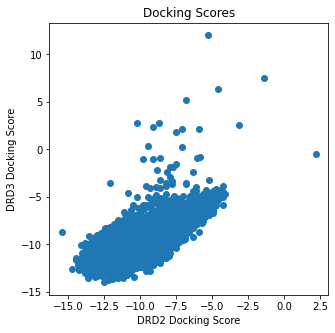

In [76]:
# visualize binding data 
from scipy.stats import gaussian_kde

xy = np.vstack([df_drd['DRD2'], df_drd['DRD3']])
z = gaussian_kde(xy)(xy)

Text(0.5, 1.0, 'Docking Scores')

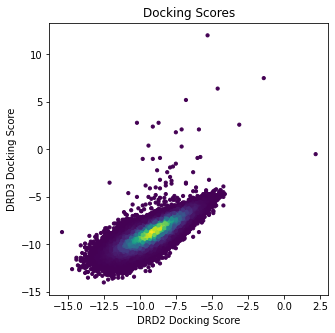

In [78]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.scatter(df_drd['DRD2'], df_drd['DRD3'], c=z, s=10)
ax.set_xlabel('DRD2 Docking Score')
ax.set_ylabel('DRD3 Docking Score')
ax.set_title('Docking Scores')

Text(0.5, 1.0, 'PF = upper right')

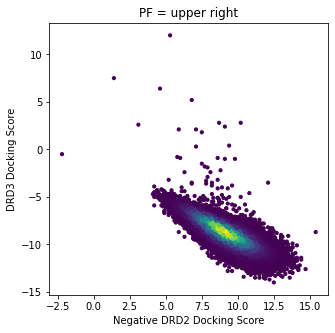

In [81]:
# replot so PF is upper right 
fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.scatter(-df_drd['DRD2'], df_drd['DRD3'], c=z, s=10)
ax.set_xlabel('Negative DRD2 Docking Score')
ax.set_ylabel('DRD3 Docking Score')
ax.set_title('PF = upper right')

In [101]:
# save DRD2 and DRD3 data in data/drd*_data.csv 

df_drd2 = df_drd[['smiles','DRD2']]
df_drd3 = df_drd[['smiles','DRD3']]
df_drd2.to_csv('../data/drd2_data.csv',index=False)
df_drd3.to_csv('../data/drd3_data.csv',index=False)

In [105]:
df_drd2_fromcsv = pd.read_csv('../data/drd2_data.csv')
df_drd3_fromcsv = pd.read_csv('../data/drd3_data.csv')
df_drd3_fromcsv.head()


,smiles,DRD3
0,C1=C(C2=C(C=C1O)OC(C(C2=O)=O)C3=CC=C(C(=C3)O)O)O,-8.0
1,O=S(=O)(N1CCNCCC1)C2=CC=CC=3C2=CC=NC3,-7.7
2,C=1C=C2S/C(/N(CC)C2=CC1OC)=C\C(=O)C,-6.3
3,C=1(N=C(C=2C=NC=CC2)C=CN1)NC=3C=C(NC(C4=CC=C(C...,-10.5
4,C1=CC=2C(=CNC2C=C1)C=3C=CN=CC3,-7.5
